**Drone Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed May 17 09:39:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.104 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
cd drive/MyDrive/yolov5_v2

/content/drive/MyDrive/yolov5_v2


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/yolov5_v2


In [ ]:

model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='/content/drive/MyDrive/yolov5_v2/drone_config.yaml', epochs=100,imgsz=416)  # train the model



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1684267094.83fef831bd7d.172.0  train_batch2.jpg
F1_curve.png					   val_batch0_labels.jpg
labels_correlogram.jpg				   val_batch0_pred.jpg
labels.jpg					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


In [ ]:
from IPython.display import display, Image

/content/drive/MyDrive/yolov5_v2


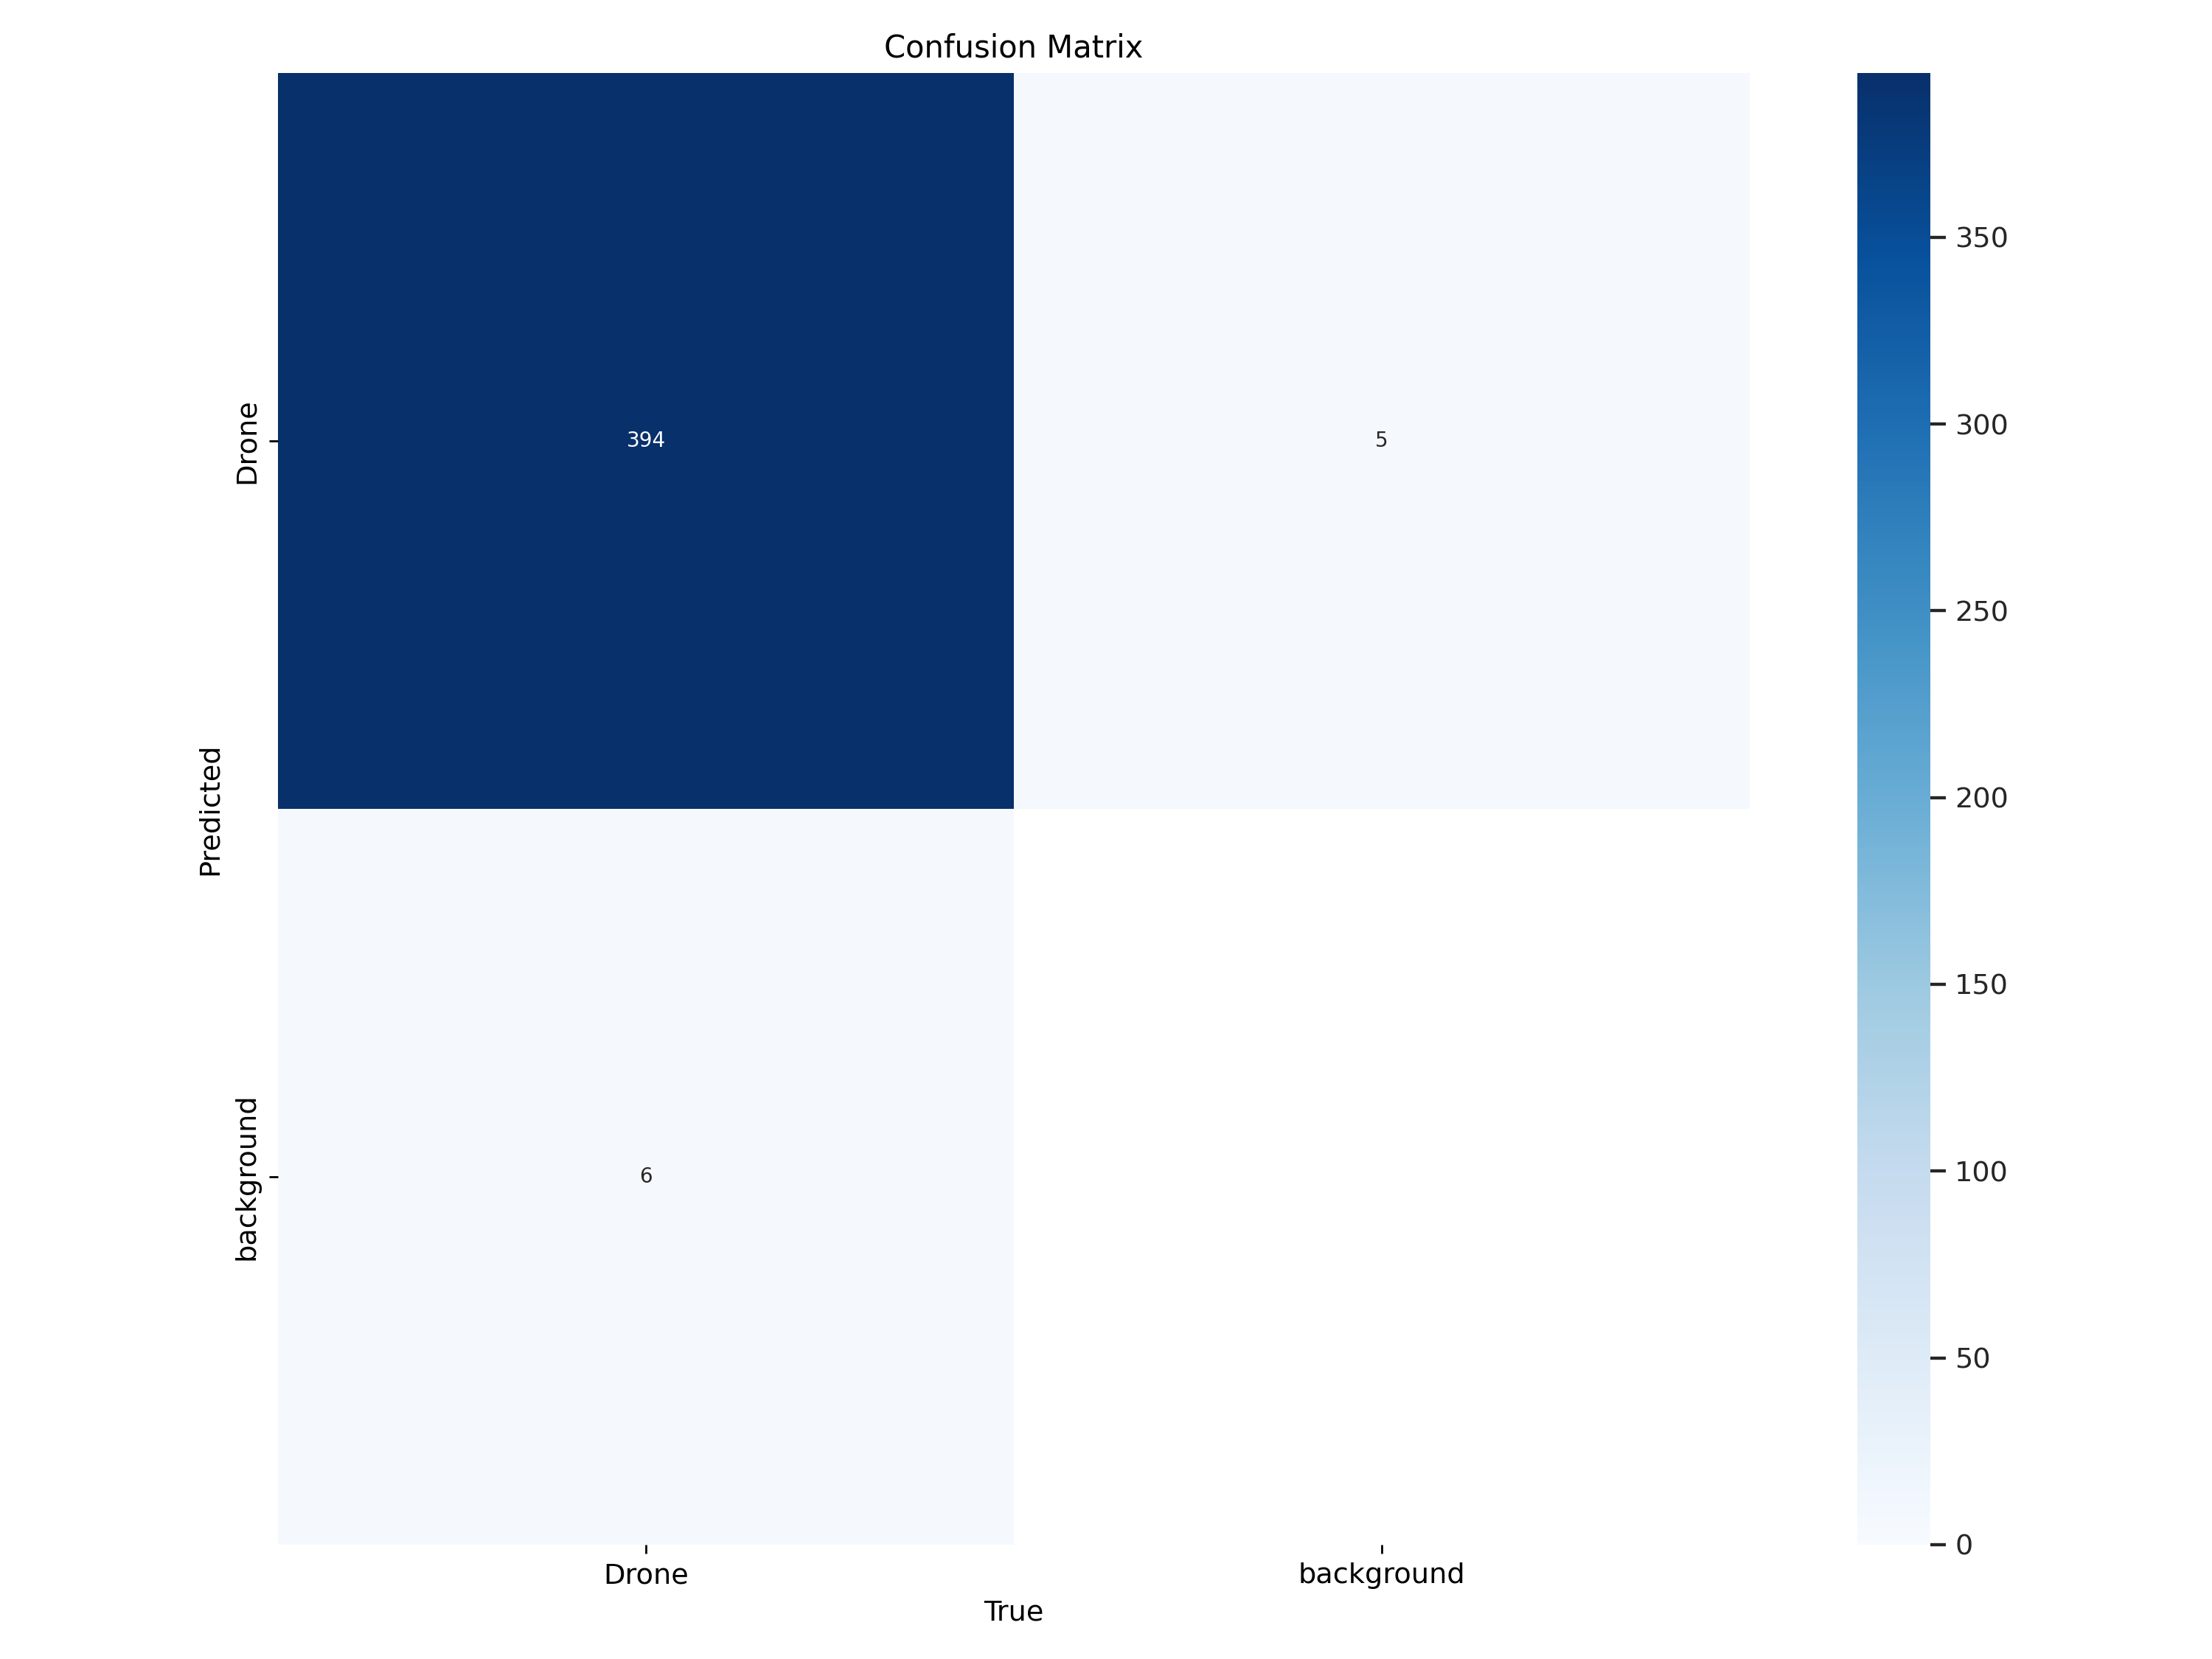

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/yolov5_v2


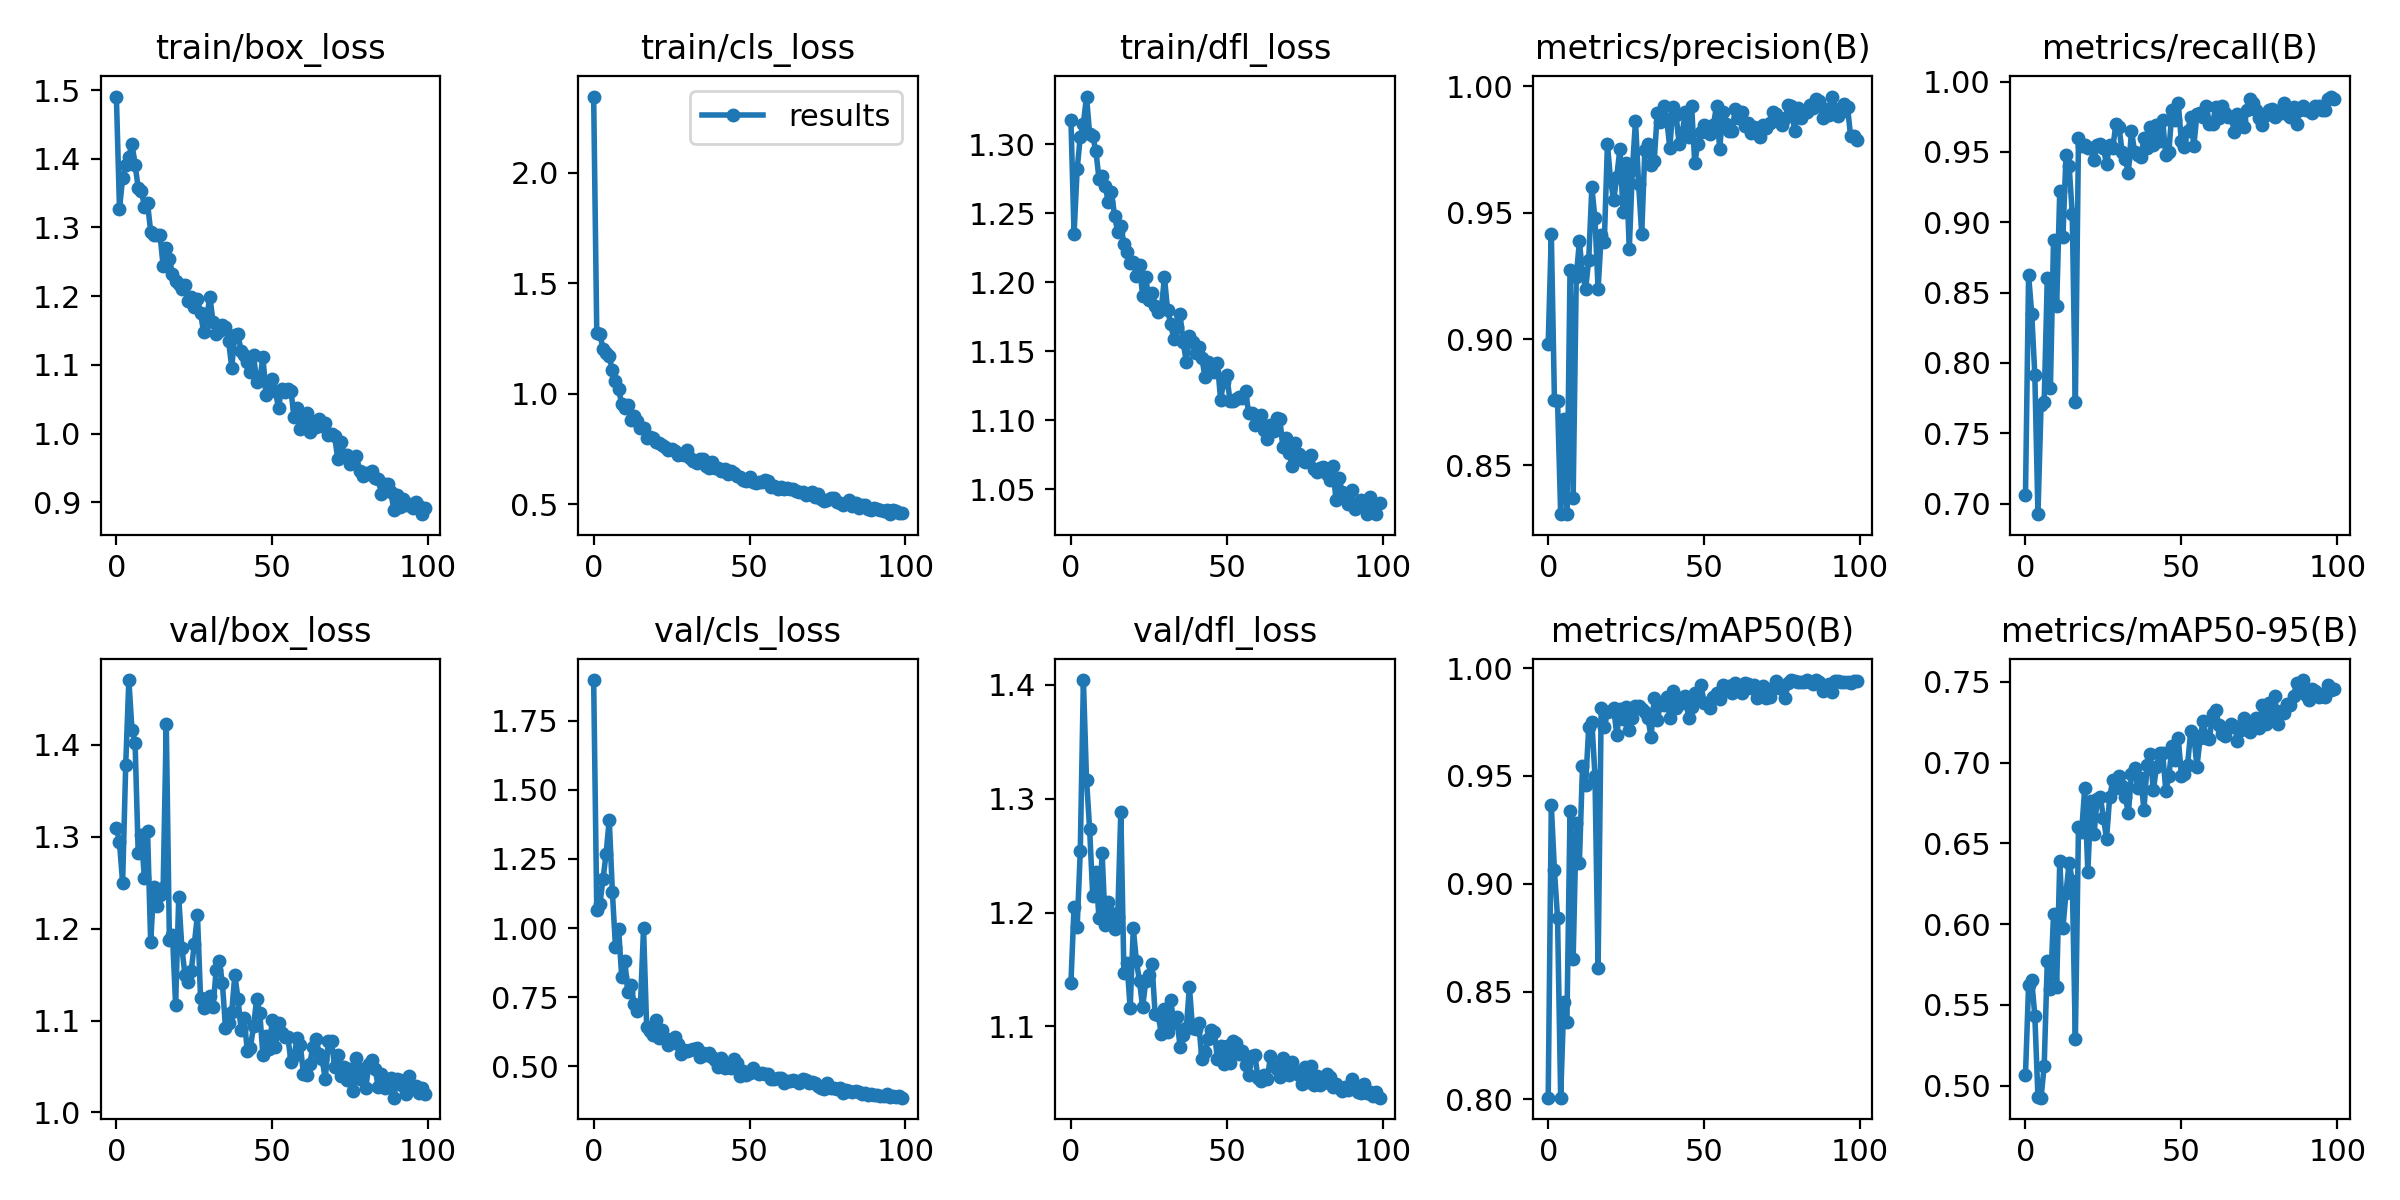

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/yolov5_v2


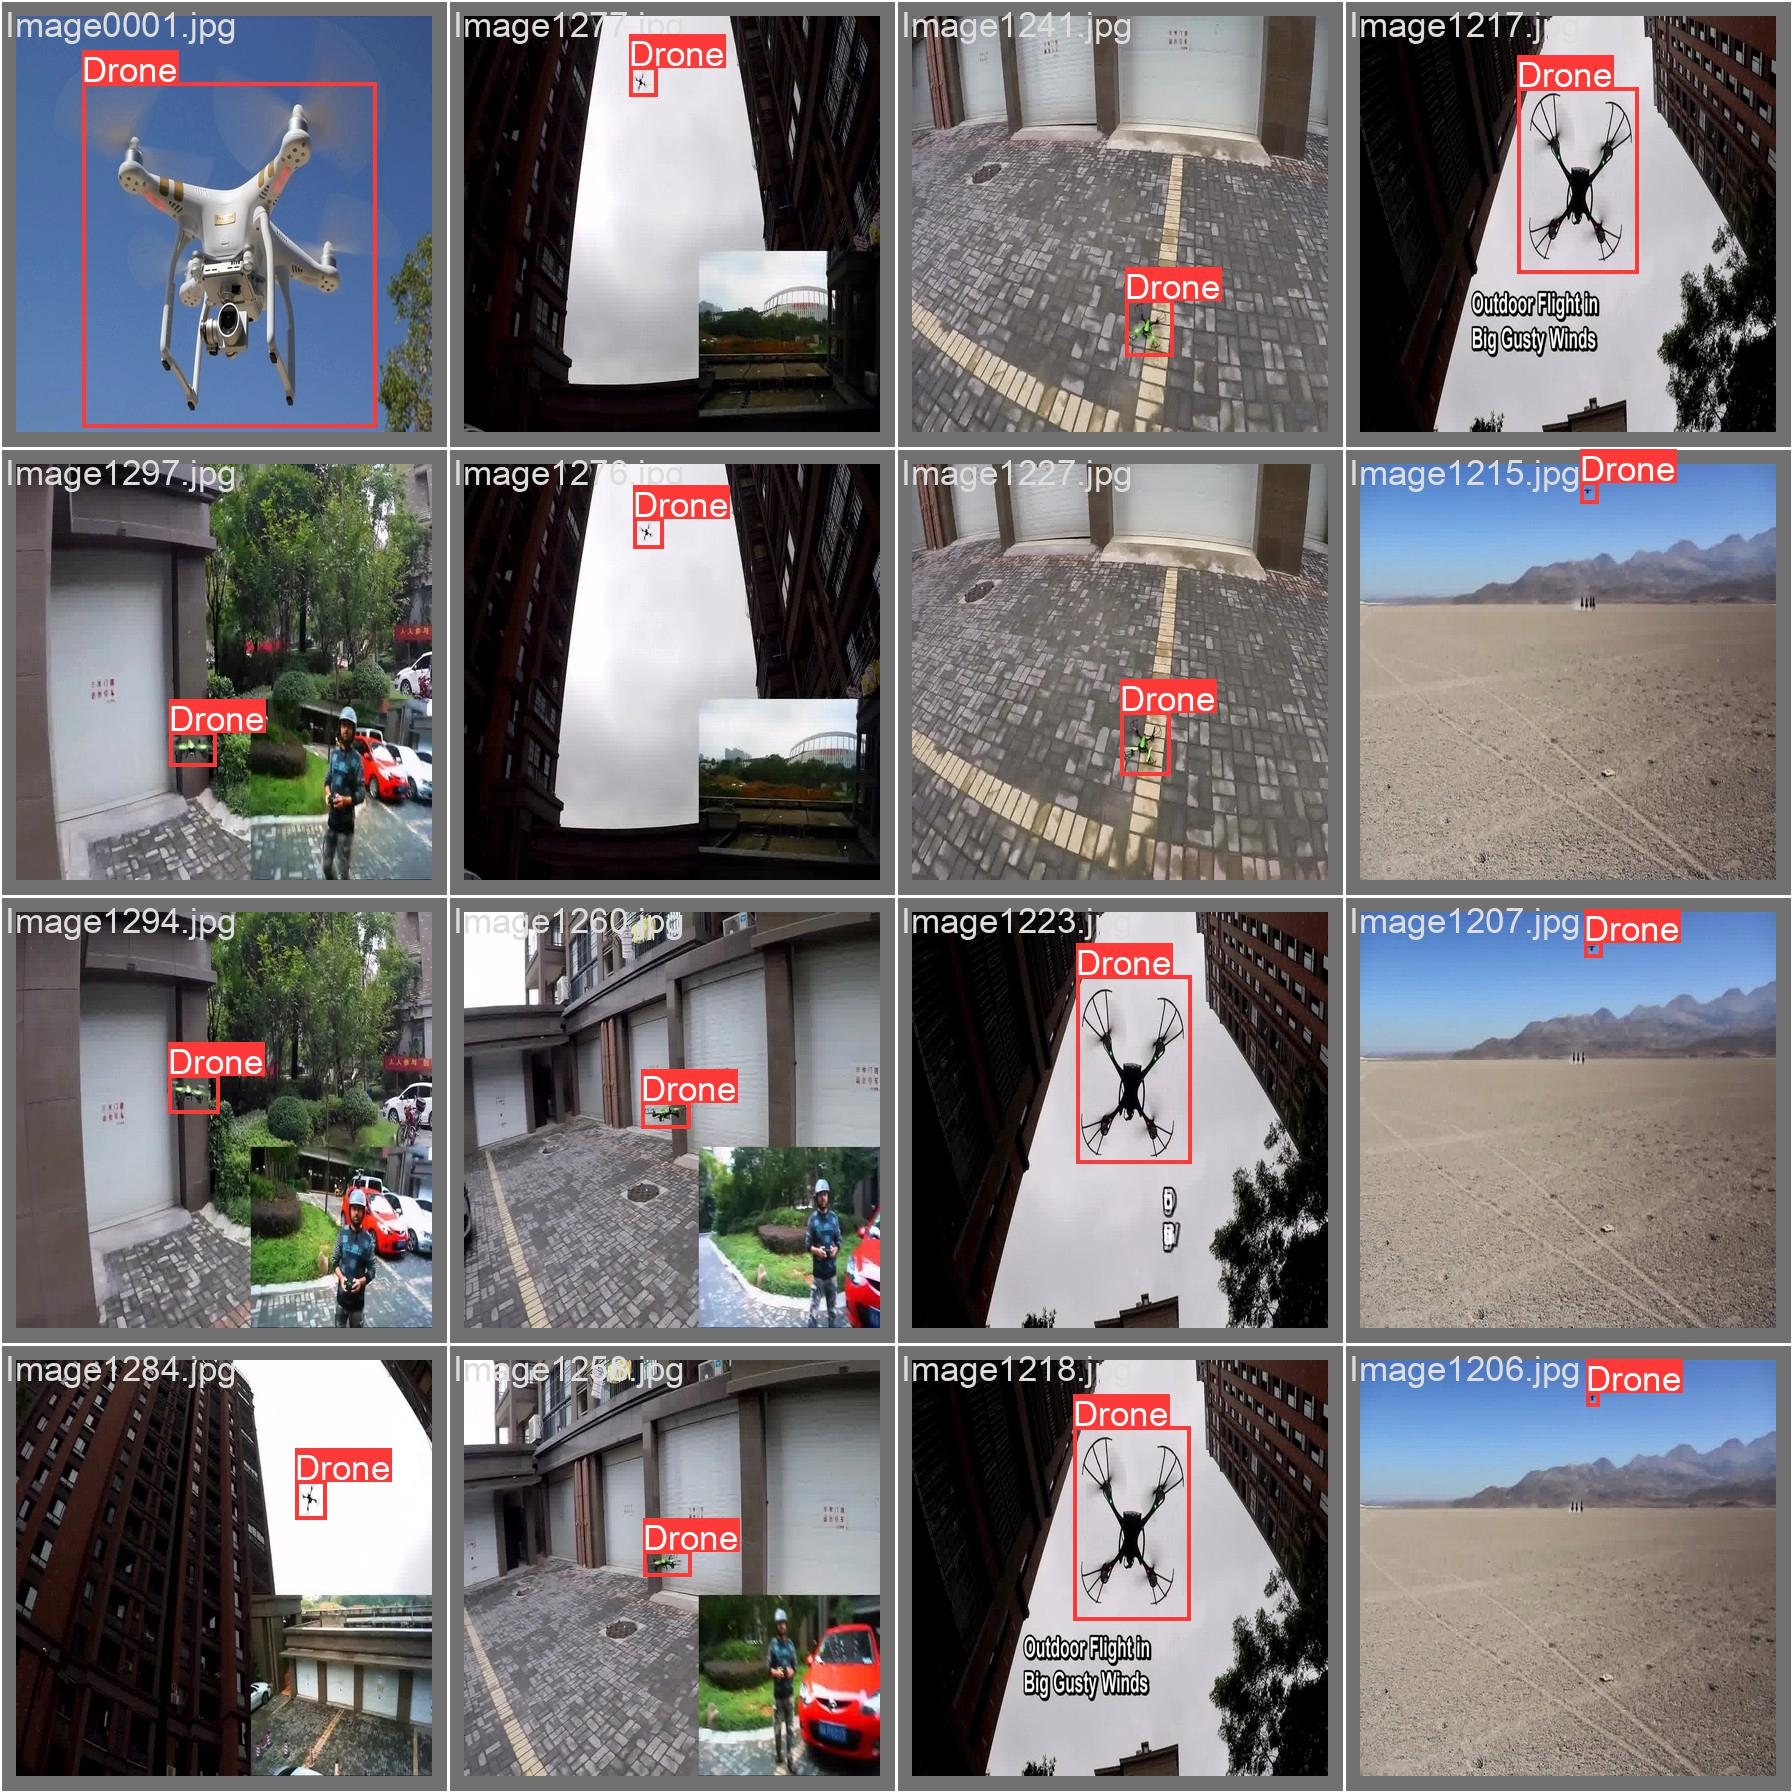

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/yolov5_v2/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
model = YOLO('/content/drive/MyDrive/yolov5_v2/runs/detect/train/weights/best.pt') 
results_val = model.val() 

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5_v2/drone/labels/valid.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]
                   all        400        400      0.991      0.983      0.992      0.751
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo predict model='/content/drive/MyDrive/yolov5_v2/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/yolov5_v2/drone/images/test'

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0012.jpg: 416x416 1 Drone, 6.0ms
image 2/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0015.jpg: 416x416 1 Drone, 6.1ms
image 3/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0028.jpg: 416x416 1 Drone, 20.9ms
image 4/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0029.jpg: 416x416 1 Drone, 7.2ms
image 5/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0031.jpg: 416x416 1 Drone, 9.0ms
image 6/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0036.jpg: 416x416 1 Drone, 6.8ms
image 7/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0038.jpg: 416x416 1 Drone, 6.8ms
image 8/200 /content/drive/MyDrive/yolov5_v2/drone/images/test/Image0052.jpg: 416x416 1 Drone, 10.8ms
image 9/200 /content/d

/content/drive/MyDrive/yolov5_v2


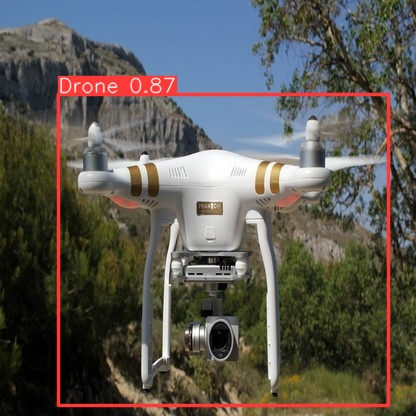

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/yolov5_v2/runs/detect/predict/Image0166.jpg')

/content/drive/MyDrive/yolov5_v2


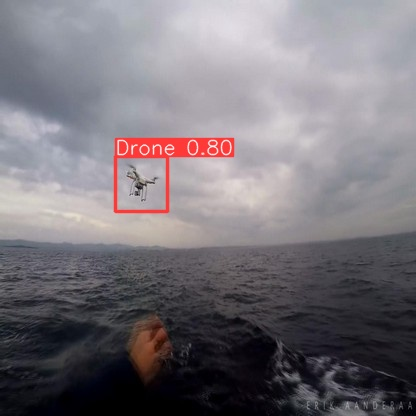

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/yolov5_v2/runs/detect/predict/Image0176.jpg')

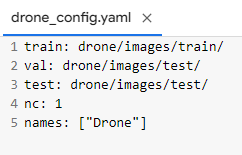

In [ ]:
model = YOLO('/content/drive/MyDrive/yolov5_v2/runs/detect/train/weights/best.pt') 
results_val = model.val() 

Ultralytics YOLOv8.0.104 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 108MB/s]
val: Scanning /content/drive/MyDrive/yolov5_v2/drone/labels/test... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [02:51<00:00,  1.17it/s]
val: New cache created: /content/drive/MyDrive/yolov5_v2/drone/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]
                   all        200        200      0.988      0.975      0.989      0.739
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val2


/content/drive/MyDrive/yolov5_v2


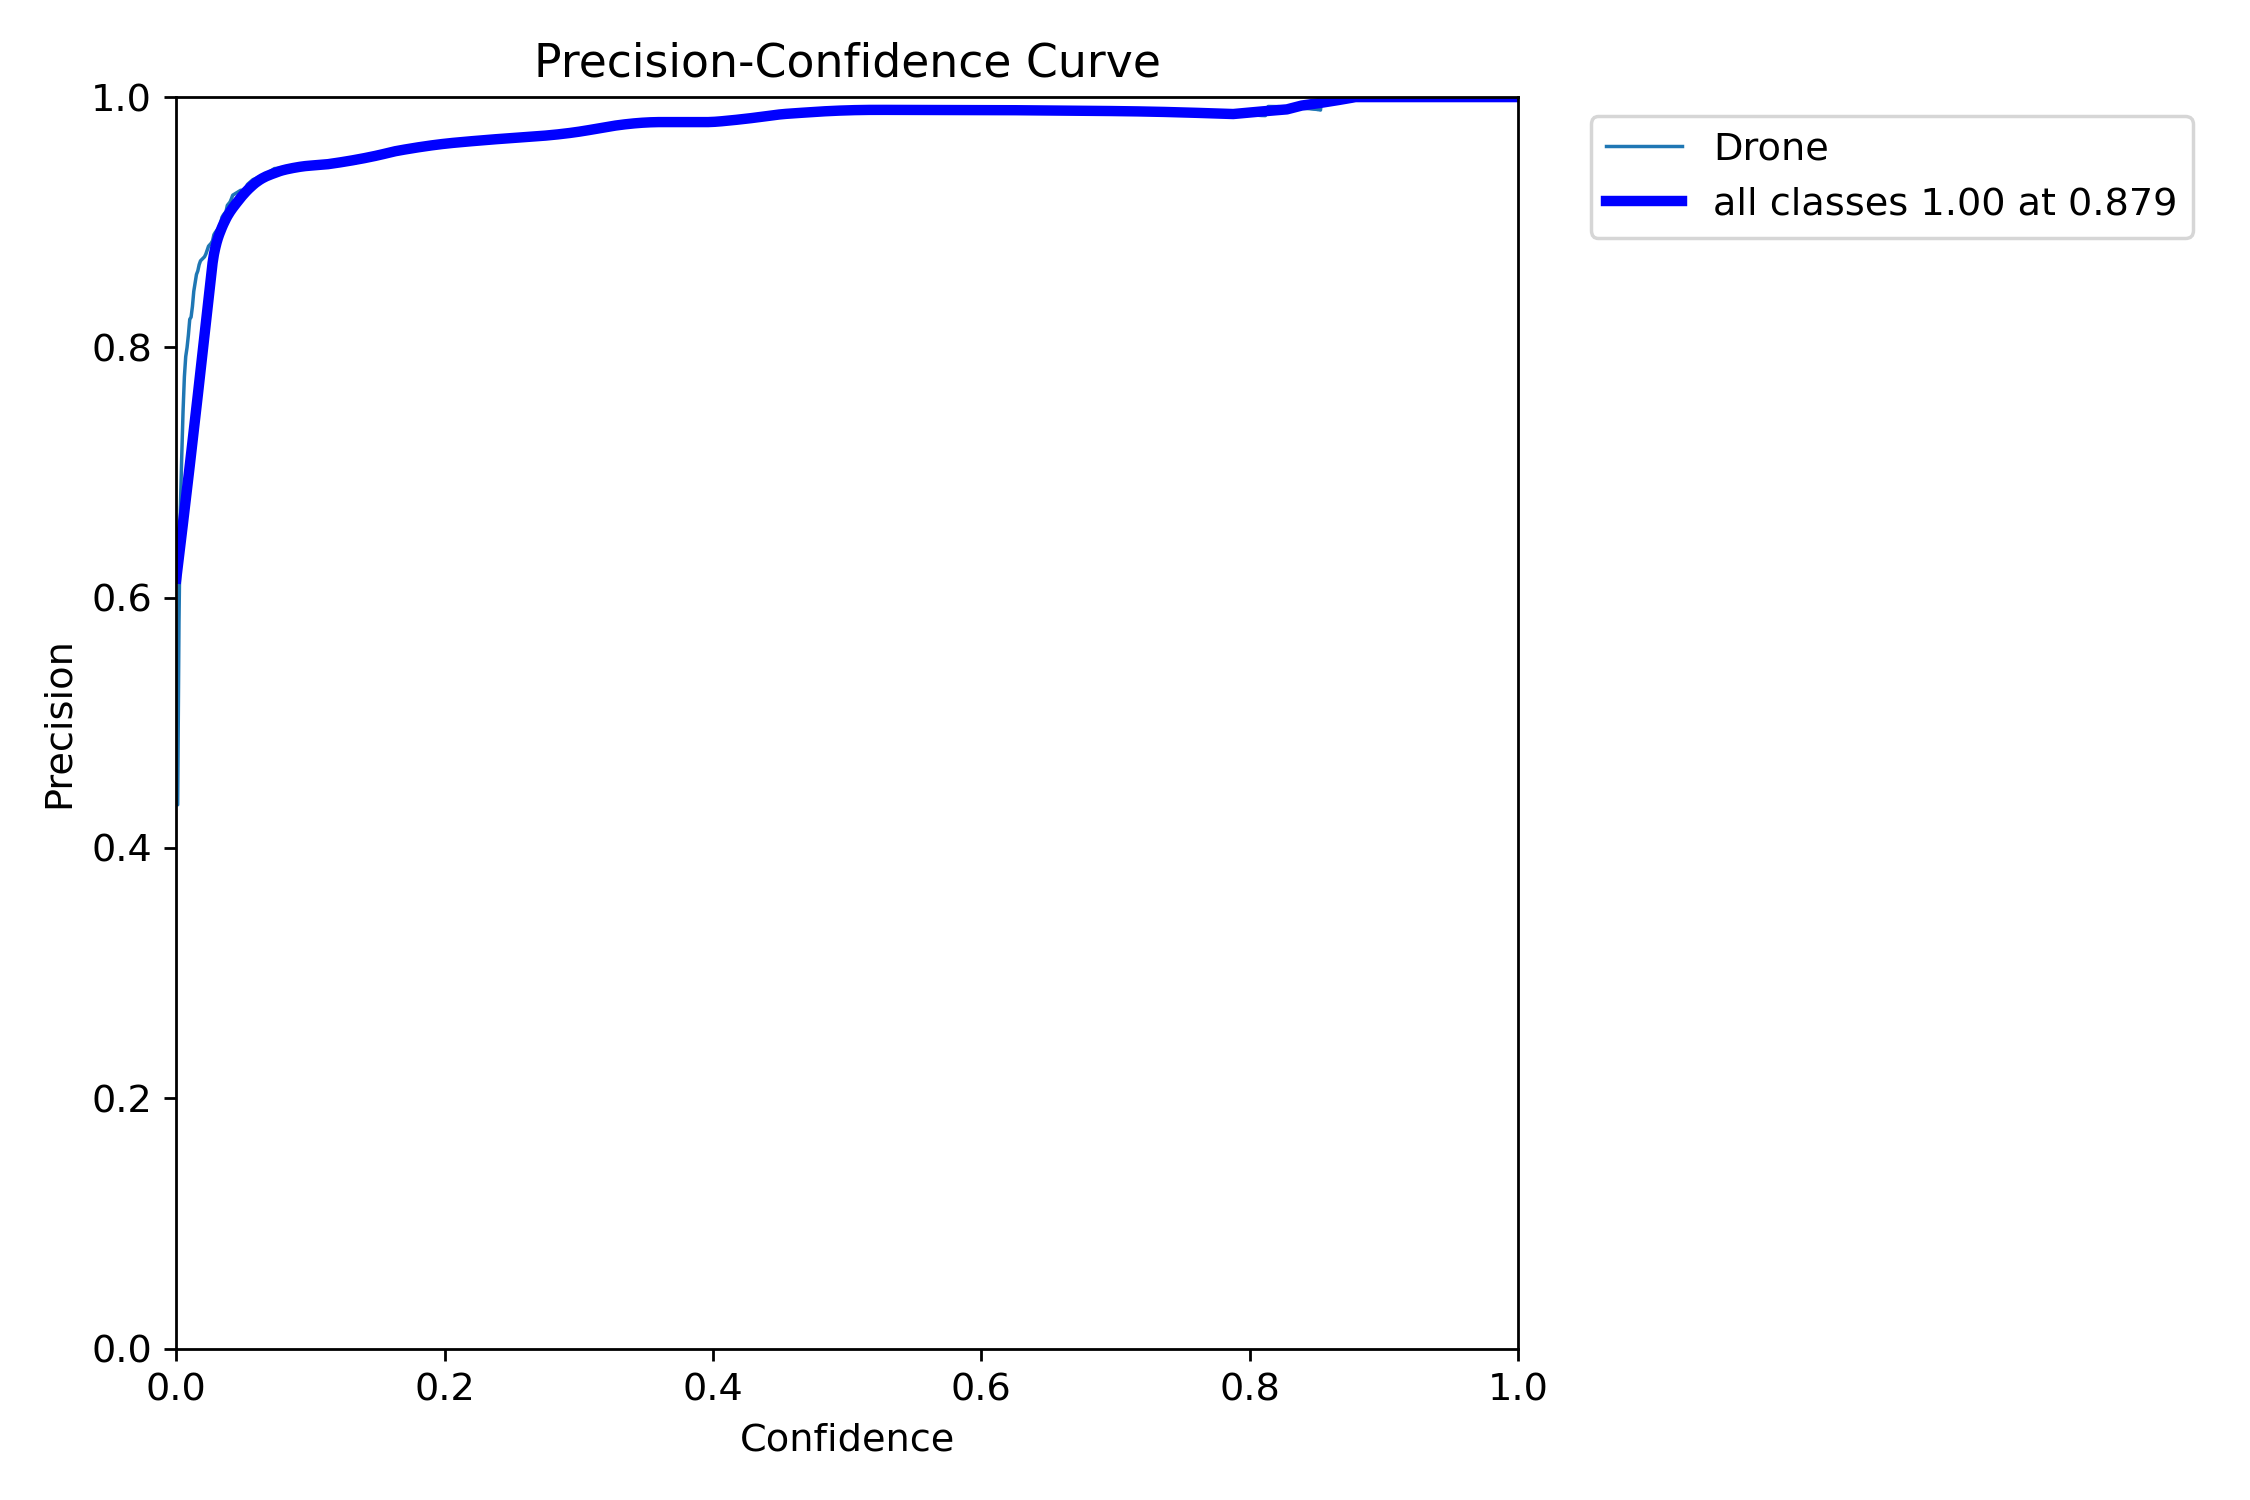

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/yolov5_v2/runs/detect/val2/P_curve.png')

/content/drive/MyDrive/yolov5_v2


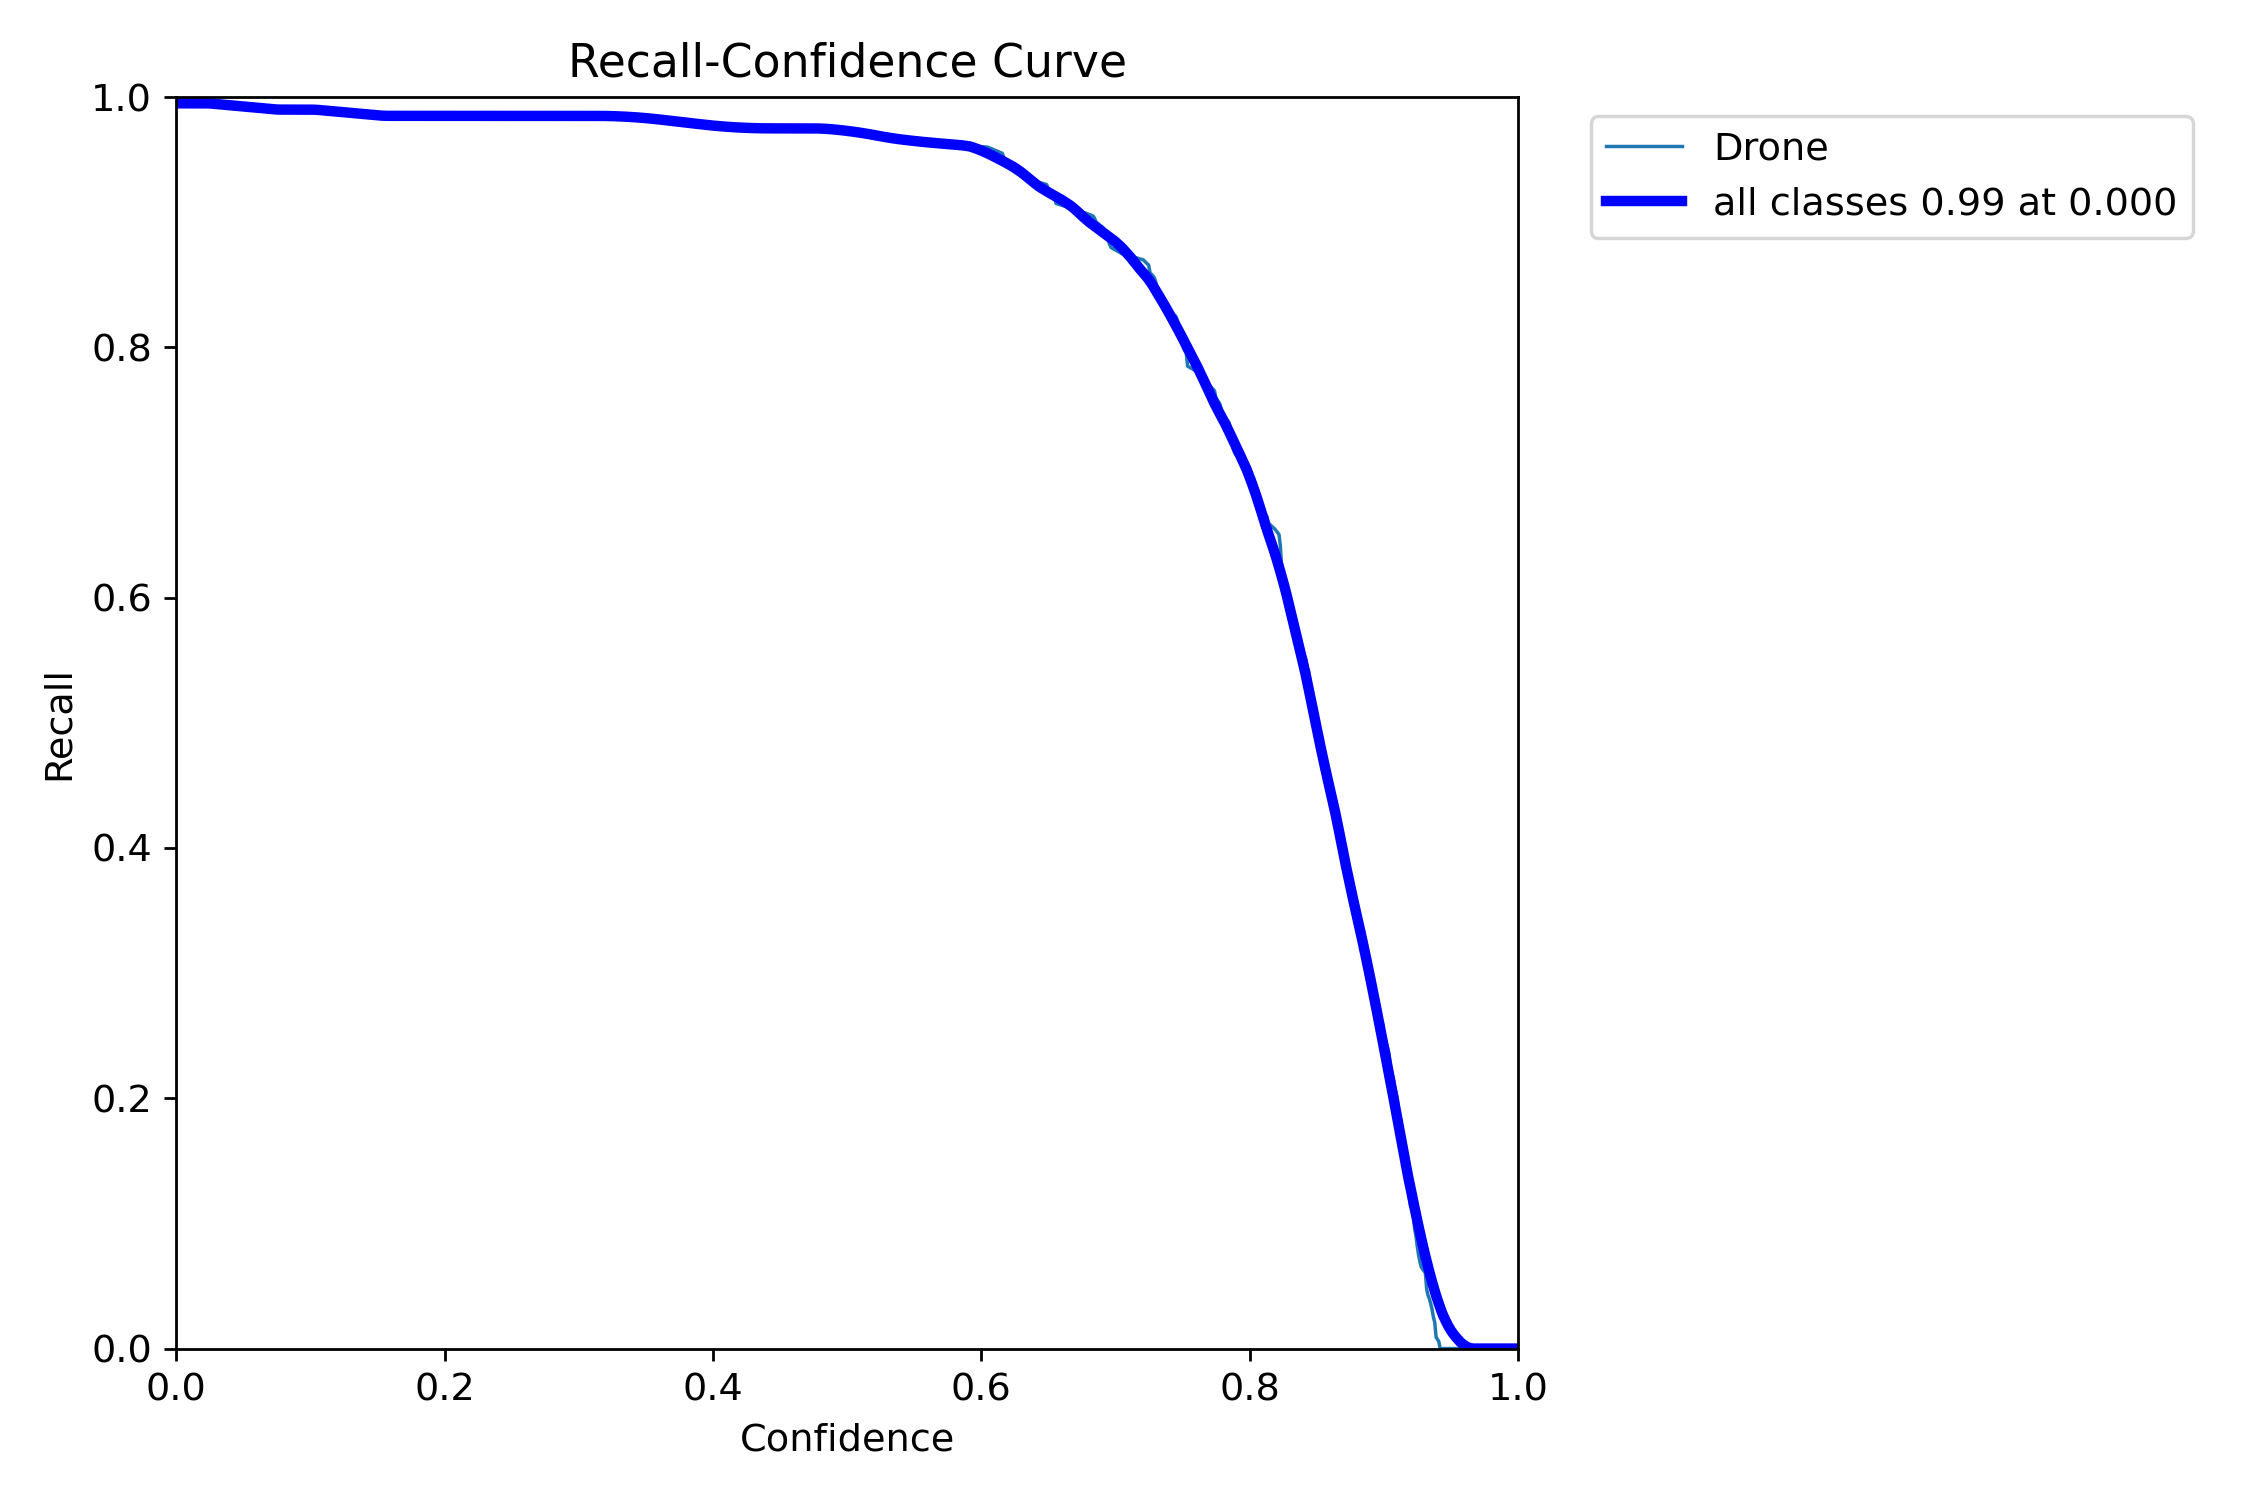

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/yolov5_v2/runs/detect/val2/R_curve.png')

**Video Tracking**

In [ ]:
!yolo predict model='/content/drive/MyDrive/yolov5_v2/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4'

Streaming output truncated to the last 5000 lines.
video 1/1 (3048/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.4ms
video 1/1 (3049/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.3ms
video 1/1 (3050/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.4ms
video 1/1 (3051/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.5ms
video 1/1 (3052/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.3ms
video 1/1 (3053/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 7.7ms
video 1/1 (3054/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 6.9ms
video 1/1 (3055/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 8.1ms
video 1/1 (3056/8045) /content/drive/MyDrive/yolov5_v2/drone/Videos/1.mp4: 224x416 (no detections), 1

In [ ]:
!yolo predict model='/content/drive/MyDrive/yolov5_v2/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4'

Ultralytics YOLOv8.0.104 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

video 1/1 (1/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 55.9ms
video 1/1 (2/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 6.5ms
video 1/1 (3/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 6.9ms
video 1/1 (4/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 7.3ms
video 1/1 (5/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 1 Drone, 6.8ms
video 1/1 (6/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 11.7ms
video 1/1 (7/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 13.5ms
video 1/1 (8/4289) /content/drive/MyDrive/yolov5_v2/drone/Videos/2.mp4: 256x416 (no detections), 11.9ms
video 1/1 (9/4289) /cont